<center>

#<b>CS353 ML Lab 5</b>

## Name: K V Sumanth Reddy
## Roll No: 181CO225
### Date: 02/03/2021
---

###Q: Write a program in python to implement KNN classifier for a sample data set. Compute the accuracy of the classifier.
---
####Dataset Used: Iris_Dataset
</center>

##Importing Libraries and Dataset

In [1]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.datasets import load_iris 

from sklearn.metrics import confusion_matrix,explained_variance_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score, classification_report

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

##Data Preprocessing

In [2]:
dataset = load_iris()
x = dataset.data
y = dataset.target

data = pd.DataFrame(dataset.data, columns=[dataset.feature_names])
data['Target'] = pd.Series(data=dataset.target, index=data.index)
data.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
57,4.9,2.4,3.3,1.0,1
85,6.0,3.4,4.5,1.6,1
26,5.0,3.4,1.6,0.4,0
90,5.5,2.6,4.4,1.2,1
25,5.0,3.0,1.6,0.2,0
24,4.8,3.4,1.9,0.2,0
140,6.7,3.1,5.6,2.4,2
12,4.8,3.0,1.4,0.1,0
51,6.4,3.2,4.5,1.5,1
7,5.0,3.4,1.5,0.2,0


##Training the model

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

print('Training dataset size:\nx_train -', len(x_train), '\ny_train -', len(y_train), '\n')
print('Testing dataset size:\nx_test -', len(x_test), '\ny_test -', len(y_test))

Training dataset size:
x_train - 105 
y_train - 105 

Testing dataset size:
x_test - 45 
y_test - 45


In [4]:
KNN = []
for i in range(1, 8):
  KNNModel = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean')
  KNN.append(KNNModel)

In [5]:
for i in range(7):
  KNN[i].fit(x_train, y_train) 

##Finding Accuracies for all models using the test dataset

In [6]:
train_accuracyKNN = []
test_accuracyKNN = []

for i in range(7):
  print('K = {}'.format(i + 1))
  train_accuracyKNN.append(KNN[i].score(x_train, y_train))
  test_accuracyKNN.append(KNN[i].score(x_test, y_test))
  y_pred = KNN[i].predict(x_test)
  print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
  print(classification_report(y_test,y_pred))
  print("\nAccuracy: %.2f" %(accuracy_score(y_test, y_pred)*100))
  print("Mean Squared Error: %.2f" %(mean_squared_error(y_test, y_pred)*100))
  print("Explained Variance: %.2f" %(explained_variance_score(y_test, y_pred)*100))
  print("R2 Score: %.2f" %(r2_score(y_test, y_pred)*100))
  print("\n\n")

K = 1
Confusion Matrix:
 [[16  0  0]
 [ 0 11  0]
 [ 0  1 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      1.00      0.96        11
           2       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45


Accuracy: 97.78
Mean Squared Error: 2.22
Explained Variance: 97.12
R2 Score: 97.05



K = 2
Confusion Matrix:
 [[16  0  0]
 [ 0 11  0]
 [ 0  1 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      1.00      0.96        11
           2       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45


Accuracy: 97.78
Mean Squar

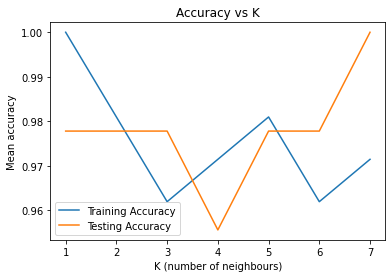

In [7]:
fig = plt.figure()
ax = plt.axes()
plt.plot([1,2,3,4,5,6,7], train_accuracyKNN, label = 'Training Accuracy')
plt.plot([1,2,3,4,5,6,7], test_accuracyKNN, label = 'Testing Accuracy')
plt.xlabel('K (number of neighbours)')
plt.ylabel('Mean accuracy')
plt.title('Accuracy vs K')
plt.legend()
plt.savefig('Graph.png')
plt.show()